In [1]:
import pandas as pd
import json
import requests
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet
import asyncio
from dash import Dash, html, dash_table, dcc
import datetime
import time
import os


c:\Users\fabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
nasdaq = pd.read_html('Quotes For Nasdaq-100 Index _ Nasdaq.html')[0]

In [3]:
# Função para prever o preço de uma ação


# Com dados de teste 80/20
# 100% reais, tentar prever 20% desses dados já obtidos, para avaliar a precisão do modelo
def forecast_prophet(ds, y):
    data = {'ds': ds, 'y': y}
    df = pd.DataFrame(data)

    # Dividindo os dados em 80/20
    split_index = int(len(df) * 0.8)
    train_data = df[:split_index]
    test_data = df[split_index:]

    # Instanciando o modelo Prophet
    model = Prophet()

    # Ajustando o modelo aos dados de treinamento
    model.fit(train_data)

    # Criando um dataframe com datas futuras para prever (20%)
    future = model.make_future_dataframe(periods=int(len(df) * 0.2))

    # Fazendo previsões
    forecast = model.predict(future)


    return forecast


# Sem dados de teste 80/20
# 80% reais e 20% futuros
def forecast_prophet(ds, y):
    data = {'ds': ds, 'y': y}
    df = pd.DataFrame(data)

    # Instanciando o modelo Prophet
    model = Prophet()
    # Ajustando o modelo aos dados de treinamento
    model.fit(df)

    # Criando um dataframe com datas futuras para prever (20%)
    future = model.make_future_dataframe(periods=int(round(len(data['ds']) *0.2)), freq='D')
    forecast = model.predict(future)

    return forecast


In [4]:
def get_stock_data(ticker, period=None):
    if period:
        stock_data =  yf.download(ticker, period="10y")
    else:
        stock_data =  yf.download(ticker)
    return stock_data

def save_forecast_data(symbol, forecast):
    forecast.to_json(f"prophet-predictions/{symbol}-forecast.json", orient='records')

In [5]:
def main(tickers):
    for ticker in tickers:
        try:
            stock = get_stock_data(ticker)
            # Supondo que 'stock' seja seu DataFrame e contenha uma coluna 'Close'
            # Primeiro, vamos calcular os retornos diários
            stock['Return'] = stock['Close'].pct_change()

            # Em seguida, calculamos o retorno acumulado
            stock['Acc_Return'] = (1 + stock['Return']).cumprod() - 1
            forecast = forecast_prophet(stock.index, stock['Acc_Return'])
            save_forecast_data(ticker, forecast)
            print(f"Saved forecast for {ticker}")

        except Exception as e:
            print(f"Error: {e}")

In [6]:
main(nasdaq.Symbol)

[*********************100%%**********************]  1 of 1 completed
09:23:14 - cmdstanpy - INFO - Chain [1] start processing
09:23:25 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for AAPL


[*********************100%%**********************]  1 of 1 completed
09:23:29 - cmdstanpy - INFO - Chain [1] start processing
09:23:29 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for ABNB


[*********************100%%**********************]  1 of 1 completed
09:23:33 - cmdstanpy - INFO - Chain [1] start processing
09:23:38 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for ADBE


[*********************100%%**********************]  1 of 1 completed
09:23:45 - cmdstanpy - INFO - Chain [1] start processing
09:23:57 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for ADI


[*********************100%%**********************]  1 of 1 completed
09:24:10 - cmdstanpy - INFO - Chain [1] start processing
09:24:19 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for ADP


[*********************100%%**********************]  1 of 1 completed
09:24:31 - cmdstanpy - INFO - Chain [1] start processing
09:24:36 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for ADSK


[*********************100%%**********************]  1 of 1 completed
09:24:52 - cmdstanpy - INFO - Chain [1] start processing
09:25:08 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for AEP


[*********************100%%**********************]  1 of 1 completed
09:25:23 - cmdstanpy - INFO - Chain [1] start processing
09:25:36 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for AMAT


[*********************100%%**********************]  1 of 1 completed
09:25:52 - cmdstanpy - INFO - Chain [1] start processing
09:26:01 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for AMD


[*********************100%%**********************]  1 of 1 completed
09:26:16 - cmdstanpy - INFO - Chain [1] start processing
09:26:27 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for AMGN


[*********************100%%**********************]  1 of 1 completed
09:26:39 - cmdstanpy - INFO - Chain [1] start processing
09:26:43 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for AMZN


[*********************100%%**********************]  1 of 1 completed
09:26:58 - cmdstanpy - INFO - Chain [1] start processing
09:27:02 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for ANSS


[*********************100%%**********************]  1 of 1 completed
09:27:21 - cmdstanpy - INFO - Chain [1] start processing
09:27:24 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for ASML


[*********************100%%**********************]  1 of 1 completed
09:27:32 - cmdstanpy - INFO - Chain [1] start processing
09:27:33 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for AVGO


[*********************100%%**********************]  1 of 1 completed
09:27:43 - cmdstanpy - INFO - Chain [1] start processing
09:27:48 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for AZN


[*********************100%%**********************]  1 of 1 completed
09:28:05 - cmdstanpy - INFO - Chain [1] start processing
09:28:13 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for BIIB


[*********************100%%**********************]  1 of 1 completed
09:28:31 - cmdstanpy - INFO - Chain [1] start processing
09:28:36 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for BKNG


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['BKR']: ConnectionError(ReadTimeoutError("HTTPSConnectionPool(host='query2.finance.yahoo.com', port=443): Read timed out."))


Error: Dataframe has less than 2 non-NaN rows.


[*********************100%%**********************]  1 of 1 completed
09:29:30 - cmdstanpy - INFO - Chain [1] start processing
09:29:38 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for CCEP


[*********************100%%**********************]  1 of 1 completed
09:29:47 - cmdstanpy - INFO - Chain [1] start processing
09:29:54 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for CDNS


[*********************100%%**********************]  1 of 1 completed
09:30:00 - cmdstanpy - INFO - Chain [1] start processing
09:30:02 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for CDW


[*********************100%%**********************]  1 of 1 completed
09:30:05 - cmdstanpy - INFO - Chain [1] start processing
09:30:05 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for CEG


[*********************100%%**********************]  1 of 1 completed
09:30:08 - cmdstanpy - INFO - Chain [1] start processing
09:30:09 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for CHTR


[*********************100%%**********************]  1 of 1 completed
09:30:26 - cmdstanpy - INFO - Chain [1] start processing
09:30:35 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for CMCSA


[*********************100%%**********************]  1 of 1 completed
09:30:44 - cmdstanpy - INFO - Chain [1] start processing
09:30:53 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for COST


[*********************100%%**********************]  1 of 1 completed
09:31:03 - cmdstanpy - INFO - Chain [1] start processing
09:31:07 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for CPRT


[*********************100%%**********************]  1 of 1 completed
09:31:11 - cmdstanpy - INFO - Chain [1] start processing
09:31:11 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for CRWD


[*********************100%%**********************]  1 of 1 completed
09:31:23 - cmdstanpy - INFO - Chain [1] start processing
09:31:32 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for CSCO


[*********************100%%**********************]  1 of 1 completed
09:31:48 - cmdstanpy - INFO - Chain [1] start processing
09:31:52 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for CSGP


[*********************100%%**********************]  1 of 1 completed
09:32:10 - cmdstanpy - INFO - Chain [1] start processing
09:32:18 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for CSX


[*********************100%%**********************]  1 of 1 completed
09:32:27 - cmdstanpy - INFO - Chain [1] start processing
09:32:37 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for CTAS


[*********************100%%**********************]  1 of 1 completed
09:32:44 - cmdstanpy - INFO - Chain [1] start processing
09:32:50 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for CTSH


[*********************100%%**********************]  1 of 1 completed
09:32:53 - cmdstanpy - INFO - Chain [1] start processing
09:32:54 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for DASH


[*********************100%%**********************]  1 of 1 completed
09:32:57 - cmdstanpy - INFO - Chain [1] start processing
09:32:57 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for DDOG


[*********************100%%**********************]  1 of 1 completed
09:33:04 - cmdstanpy - INFO - Chain [1] start processing
09:33:07 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for DLTR


[*********************100%%**********************]  1 of 1 completed
09:33:20 - cmdstanpy - INFO - Chain [1] start processing
09:33:23 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for DXCM


[*********************100%%**********************]  1 of 1 completed
09:33:36 - cmdstanpy - INFO - Chain [1] start processing
09:33:43 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for EA


[*********************100%%**********************]  1 of 1 completed
09:34:07 - cmdstanpy - INFO - Chain [1] start processing
09:34:21 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for EXC


[*********************100%%**********************]  1 of 1 completed
09:34:30 - cmdstanpy - INFO - Chain [1] start processing
09:34:31 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for FANG


[*********************100%%**********************]  1 of 1 completed
09:34:44 - cmdstanpy - INFO - Chain [1] start processing
09:34:51 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for FAST


[*********************100%%**********************]  1 of 1 completed
09:35:00 - cmdstanpy - INFO - Chain [1] start processing
09:35:03 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for FTNT


[*********************100%%**********************]  1 of 1 completed
09:35:06 - cmdstanpy - INFO - Chain [1] start processing
09:35:06 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for GEHC


[*********************100%%**********************]  1 of 1 completed
09:35:09 - cmdstanpy - INFO - Chain [1] start processing
09:35:09 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for GFS


[*********************100%%**********************]  1 of 1 completed
09:35:19 - cmdstanpy - INFO - Chain [1] start processing
09:35:27 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for GILD


[*********************100%%**********************]  1 of 1 completed
09:35:43 - cmdstanpy - INFO - Chain [1] start processing
09:35:46 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for GOOG


[*********************100%%**********************]  1 of 1 completed
09:36:03 - cmdstanpy - INFO - Chain [1] start processing
09:36:06 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for GOOGL


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['HON']: ReadTimeout(ReadTimeoutError("HTTPSConnectionPool(host='query2.finance.yahoo.com', port=443): Read timed out. (read timeout=10)"))


Error: Dataframe has less than 2 non-NaN rows.


[*********************100%%**********************]  1 of 1 completed
09:36:42 - cmdstanpy - INFO - Chain [1] start processing
09:36:45 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for IDXX


[*********************100%%**********************]  1 of 1 completed
09:36:58 - cmdstanpy - INFO - Chain [1] start processing
09:37:02 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for ILMN


[*********************100%%**********************]  1 of 1 completed
09:37:15 - cmdstanpy - INFO - Chain [1] start processing
09:37:27 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for INTC


[*********************100%%**********************]  1 of 1 completed
09:37:38 - cmdstanpy - INFO - Chain [1] start processing
09:37:42 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for INTU


[*********************100%%**********************]  1 of 1 completed
09:37:48 - cmdstanpy - INFO - Chain [1] start processing
09:37:50 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for ISRG


[*********************100%%**********************]  1 of 1 completed
09:37:56 - cmdstanpy - INFO - Chain [1] start processing
09:37:59 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for KDP


[*********************100%%**********************]  1 of 1 completed
09:38:02 - cmdstanpy - INFO - Chain [1] start processing
09:38:03 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for KHC


[*********************100%%**********************]  1 of 1 completed
09:38:10 - cmdstanpy - INFO - Chain [1] start processing
09:38:18 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for KLAC


[*********************100%%**********************]  1 of 1 completed
09:38:31 - cmdstanpy - INFO - Chain [1] start processing
09:38:39 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for LIN


[*********************100%%**********************]  1 of 1 completed
09:39:12 - cmdstanpy - INFO - Chain [1] start processing
09:39:20 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for LRCX


[*********************100%%**********************]  1 of 1 completed
09:39:32 - cmdstanpy - INFO - Chain [1] start processing
09:39:34 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for LULU


[*********************100%%**********************]  1 of 1 completed
09:39:44 - cmdstanpy - INFO - Chain [1] start processing
09:39:50 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for MAR


[*********************100%%**********************]  1 of 1 completed
09:40:04 - cmdstanpy - INFO - Chain [1] start processing
09:40:10 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for MCHP


[*********************100%%**********************]  1 of 1 completed
09:40:17 - cmdstanpy - INFO - Chain [1] start processing
09:40:17 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for MDB


[*********************100%%**********************]  1 of 1 completed
09:40:23 - cmdstanpy - INFO - Chain [1] start processing
09:40:29 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for MDLZ


[*********************100%%**********************]  1 of 1 completed
09:40:35 - cmdstanpy - INFO - Chain [1] start processing
09:40:37 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for MELI


[*********************100%%**********************]  1 of 1 completed
09:40:42 - cmdstanpy - INFO - Chain [1] start processing
09:40:43 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for META


[*********************100%%**********************]  1 of 1 completed
09:40:54 - cmdstanpy - INFO - Chain [1] start processing
09:41:07 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for MNST


[*********************100%%**********************]  1 of 1 completed
09:41:11 - cmdstanpy - INFO - Chain [1] start processing
09:41:12 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for MRNA


[*********************100%%**********************]  1 of 1 completed
09:41:18 - cmdstanpy - INFO - Chain [1] start processing
09:41:21 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for MRVL


[*********************100%%**********************]  1 of 1 completed
09:41:34 - cmdstanpy - INFO - Chain [1] start processing
09:41:41 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for MSFT


[*********************100%%**********************]  1 of 1 completed
09:41:57 - cmdstanpy - INFO - Chain [1] start processing
09:42:10 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for MU


[*********************100%%**********************]  1 of 1 completed
09:42:20 - cmdstanpy - INFO - Chain [1] start processing
09:42:23 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for NFLX


[*********************100%%**********************]  1 of 1 completed
09:42:33 - cmdstanpy - INFO - Chain [1] start processing
09:42:37 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for NVDA


[*********************100%%**********************]  1 of 1 completed
09:42:46 - cmdstanpy - INFO - Chain [1] start processing
09:42:47 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for NXPI


[*********************100%%**********************]  1 of 1 completed
09:43:11 - cmdstanpy - INFO - Chain [1] start processing
09:43:17 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for ODFL


[*********************100%%**********************]  1 of 1 completed
09:43:26 - cmdstanpy - INFO - Chain [1] start processing
09:43:30 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for ON


[*********************100%%**********************]  1 of 1 completed
09:43:38 - cmdstanpy - INFO - Chain [1] start processing
09:43:44 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for ORLY


[*********************100%%**********************]  1 of 1 completed
09:43:49 - cmdstanpy - INFO - Chain [1] start processing
09:43:50 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for PANW


[*********************100%%**********************]  1 of 1 completed
09:44:15 - cmdstanpy - INFO - Chain [1] start processing
09:44:29 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for PAYX


[*********************100%%**********************]  1 of 1 completed
09:44:43 - cmdstanpy - INFO - Chain [1] start processing
09:44:54 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for PCAR


[*********************100%%**********************]  1 of 1 completed
09:45:00 - cmdstanpy - INFO - Chain [1] start processing
09:45:01 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for PDD


[*********************100%%**********************]  1 of 1 completed
09:45:12 - cmdstanpy - INFO - Chain [1] start processing
09:45:25 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for PEP


[*********************100%%**********************]  1 of 1 completed
09:45:32 - cmdstanpy - INFO - Chain [1] start processing
09:45:34 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for PYPL


[*********************100%%**********************]  1 of 1 completed
09:45:53 - cmdstanpy - INFO - Chain [1] start processing
09:45:59 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for QCOM


[*********************100%%**********************]  1 of 1 completed
09:46:09 - cmdstanpy - INFO - Chain [1] start processing
09:46:17 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for REGN


[*********************100%%**********************]  1 of 1 completed
09:46:27 - cmdstanpy - INFO - Chain [1] start processing
09:46:33 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for ROP


[*********************100%%**********************]  1 of 1 completed
09:46:44 - cmdstanpy - INFO - Chain [1] start processing
09:46:49 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for ROST


[*********************100%%**********************]  1 of 1 completed
09:47:18 - cmdstanpy - INFO - Chain [1] start processing
09:47:23 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for SBUX


[*********************100%%**********************]  1 of 1 completed
09:47:31 - cmdstanpy - INFO - Chain [1] start processing
09:47:38 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for SIRI


[*********************100%%**********************]  1 of 1 completed
09:47:49 - cmdstanpy - INFO - Chain [1] start processing
09:47:54 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for SNPS


[*********************100%%**********************]  1 of 1 completed
09:47:59 - cmdstanpy - INFO - Chain [1] start processing
09:48:00 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for TEAM


[*********************100%%**********************]  1 of 1 completed
09:48:05 - cmdstanpy - INFO - Chain [1] start processing
09:48:08 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for TMUS


[*********************100%%**********************]  1 of 1 completed
09:48:16 - cmdstanpy - INFO - Chain [1] start processing
09:48:17 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for TSLA


[*********************100%%**********************]  1 of 1 completed
09:48:20 - cmdstanpy - INFO - Chain [1] start processing
09:48:21 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for TTD


[*********************100%%**********************]  1 of 1 completed
09:48:26 - cmdstanpy - INFO - Chain [1] start processing
09:48:31 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for TTWO


[*********************100%%**********************]  1 of 1 completed
09:48:39 - cmdstanpy - INFO - Chain [1] start processing
09:48:55 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for TXN


[*********************100%%**********************]  1 of 1 completed
09:49:02 - cmdstanpy - INFO - Chain [1] start processing
09:49:03 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for VRSK


[*********************100%%**********************]  1 of 1 completed
09:49:08 - cmdstanpy - INFO - Chain [1] start processing
09:49:16 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for VRTX


[*********************100%%**********************]  1 of 1 completed
09:49:29 - cmdstanpy - INFO - Chain [1] start processing
09:49:39 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for WBA


[*********************100%%**********************]  1 of 1 completed
09:49:46 - cmdstanpy - INFO - Chain [1] start processing
09:49:49 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for WBD


[*********************100%%**********************]  1 of 1 completed
09:49:53 - cmdstanpy - INFO - Chain [1] start processing
09:49:54 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for WDAY


[*********************100%%**********************]  1 of 1 completed
09:50:02 - cmdstanpy - INFO - Chain [1] start processing
09:50:16 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for XEL


[*********************100%%**********************]  1 of 1 completed
09:50:22 - cmdstanpy - INFO - Chain [1] start processing
09:50:23 - cmdstanpy - INFO - Chain [1] done processing


Saved forecast for ZS


In [18]:
#plota os gráficos das previsões junto aos dados reais

def plot_predictions(ticker):


    #pega os dados
    stock = get_stock_data(ticker)


    #prepara o retorno acumulado
    stock['Return'] = stock['Close'].pct_change()
    stock['Acc_Return'] = (1 + stock['Return']).cumprod() - 1

    # preencher nan
    stock.fillna(0, inplace=True)

    #cria forecast
    forecast = forecast_prophet(stock.index, stock['Acc_Return'])

    #Plota gráfico
    plt.figure(figsize=(10, 6))
    plt.plot(pd.to_datetime(stock.index), stock['Acc_Return'], label='Actual', color='black')
    plt.plot(pd.to_datetime(forecast['ds'], unit='ms'), forecast['yhat'], label='Predicted', color='blue')
    plt.fill_between(pd.to_datetime(forecast['ds'], unit='ms'), forecast['yhat_lower'], forecast['yhat_upper'], color='lightblue', alpha=0.3)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(f'Predictions with Upper and Lower Bounds {ticker}')
    plt.legend()
    plt.grid(True)
    plt.show()

[*********************100%%**********************]  1 of 1 completed
11:18:21 - cmdstanpy - INFO - Chain [1] start processing
11:18:23 - cmdstanpy - INFO - Chain [1] done processing


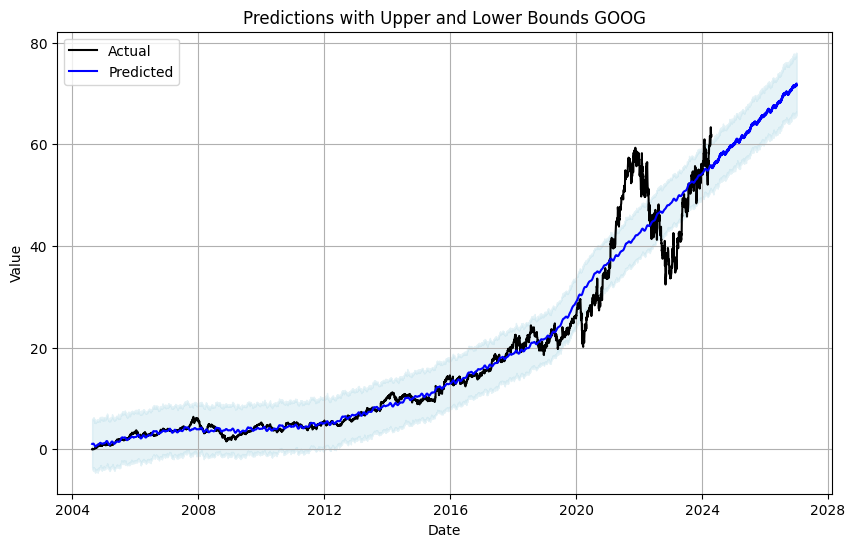

In [20]:
plot_predictions('GOOG')

In [9]:
stock = get_stock_data("MSFT")

[*********************100%%**********************]  1 of 1 completed


In [10]:

stock['Return'] = stock['Close'].pct_change()
stock['Acc_Return'] = (1 + stock['Return']).cumprod() - 1
stock.fillna(0, inplace=True)

In [11]:
stock

,Open,High,Low,Close,Adj Close,Volume,Return,Acc_Return
Date,,,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060163,1031788800,0.000000,0.000000
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062311,308160000,0.035712,0.035712
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063386,133171200,0.017250,0.053578
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061774,67766400,-0.025432,0.026784
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060700,47894400,-0.017390,0.008928
...,...,...,...,...,...,...,...,...
2024-04-11,425.820007,429.369995,422.359985,427.929993,427.929993,17966400,0.011033,4400.575683
2024-04-12,424.049988,425.179993,419.769989,421.899994,421.899994,19232100,-0.014091,4338.552697
2024-04-15,426.600006,426.820007,413.429993,413.640015,413.640015,20273500,-0.019578,4253.592717


In [12]:
stock_forecast = forecast_prophet(stock.index, stock['Acc_Return'])

09:50:57 - cmdstanpy - INFO - Chain [1] start processing
09:51:04 - cmdstanpy - INFO - Chain [1] done processing


In [21]:
# Stock forecast dividido por ticker (?)

stock_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1986-03-13,-3.583400,-189.314738,151.161978,-3.583400,-3.583400,-8.124423,-8.124423,-8.124423,-0.386248,-0.386248,-0.386248,-7.738176,-7.738176,-7.738176,0.0,0.0,0.0,-11.707824
1,1986-03-14,-3.573944,-199.296500,164.630225,-3.573944,-3.573944,-8.068200,-8.068200,-8.068200,-1.087150,-1.087150,-1.087150,-6.981049,-6.981049,-6.981049,0.0,0.0,0.0,-11.642144
2,1986-03-17,-3.545575,-197.411399,161.516832,-3.545575,-3.545575,-4.936891,-4.936891,-4.936891,-0.686836,-0.686836,-0.686836,-4.250055,-4.250055,-4.250055,0.0,0.0,0.0,-8.482467
3,1986-03-18,-3.536119,-203.732636,162.352221,-3.536119,-3.536119,-4.333929,-4.333929,-4.333929,-1.102115,-1.102115,-1.102115,-3.231813,-3.231813,-3.231813,0.0,0.0,0.0,-7.870048
4,1986-03-19,-3.526663,-188.464403,157.897261,-3.526663,-3.526663,-2.536022,-2.536022,-2.536022,-0.353003,-0.353003,-0.353003,-2.183019,-2.183019,-2.183019,0.0,0.0,0.0,-6.062685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11516,2029-07-16,6021.961455,5527.077564,6488.272978,5548.662685,6457.889105,8.548677,8.548677,8.548677,-0.686836,-0.686836,-0.686836,9.235513,9.235513,9.235513,0.0,0.0,0.0,6030.510132
11517,2029-07-17,6023.167691,5520.954456,6510.298843,5549.520080,6459.475129,8.291977,8.291977,8.291977,-1.102115,-1.102115,-1.102115,9.394093,9.394093,9.394093,0.0,0.0,0.0,6031.459668
11518,2029-07-18,6024.373927,5554.621282,6520.579812,5550.377475,6461.061154,9.152025,9.152025,9.152025,-0.353003,-0.353003,-0.353003,9.505028,9.505028,9.505028,0.0,0.0,0.0,6033.525952
11519,2029-07-19,6025.580162,5518.617171,6517.090939,5551.234870,6462.647179,9.181473,9.181473,9.181473,-0.386248,-0.386248,-0.386248,9.567721,9.567721,9.567721,0.0,0.0,0.0,6034.761635


In [13]:
stock_forecast.to_csv('Prophet Forecast.csv', encoding='utf-8')

In [14]:
df_forecast = pd.read_csv("Prophet Forecast.csv")

In [15]:
df_forecast

,Unnamed: 0,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,0,1986-03-13,-3.583400,-189.314738,151.161978,-3.583400,-3.583400,-8.124423,-8.124423,-8.124423,-0.386248,-0.386248,-0.386248,-7.738176,-7.738176,-7.738176,0.0,0.0,0.0,-11.707824
1,1,1986-03-14,-3.573944,-199.296500,164.630225,-3.573944,-3.573944,-8.068200,-8.068200,-8.068200,-1.087150,-1.087150,-1.087150,-6.981049,-6.981049,-6.981049,0.0,0.0,0.0,-11.642144
2,2,1986-03-17,-3.545575,-197.411399,161.516832,-3.545575,-3.545575,-4.936891,-4.936891,-4.936891,-0.686836,-0.686836,-0.686836,-4.250055,-4.250055,-4.250055,0.0,0.0,0.0,-8.482467
3,3,1986-03-18,-3.536119,-203.732636,162.352221,-3.536119,-3.536119,-4.333929,-4.333929,-4.333929,-1.102115,-1.102115,-1.102115,-3.231813,-3.231813,-3.231813,0.0,0.0,0.0,-7.870048
4,4,1986-03-19,-3.526663,-188.464403,157.897261,-3.526663,-3.526663,-2.536022,-2.536022,-2.536022,-0.353003,-0.353003,-0.353003,-2.183019,-2.183019,-2.183019,0.0,0.0,0.0,-6.062685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11516,11516,2029-07-16,6021.961455,5527.077564,6488.272978,5548.662685,6457.889105,8.548677,8.548677,8.548677,-0.686836,-0.686836,-0.686836,9.235513,9.235513,9.235513,0.0,0.0,0.0,6030.510132
11517,11517,2029-07-17,6023.167691,5520.954456,6510.298843,5549.520080,6459.475129,8.291977,8.291977,8.291977,-1.102115,-1.102115,-1.102115,9.394093,9.394093,9.394093,0.0,0.0,0.0,6031.459668
11518,11518,2029-07-18,6024.373927,5554.621282,6520.579812,5550.377475,6461.061154,9.152025,9.152025,9.152025,-0.353003,-0.353003,-0.353003,9.505028,9.505028,9.505028,0.0,0.0,0.0,6033.525952
11519,11519,2029-07-19,6025.580162,5518.617171,6517.090939,5551.234870,6462.647179,9.181473,9.181473,9.181473,-0.386248,-0.386248,-0.386248,9.567721,9.567721,9.567721,0.0,0.0,0.0,6034.761635
